In [1]:

import torch
from diffusers import StableDiffusionImg2ImgPipeline

# Set device
device = (
    "mps"
    if torch.backends.mps.is_available()
    else "cuda"
    if torch.cuda.is_available()
    else "cpu"
)
#Loading an Img2Img pipeline
model_id = "stabilityai/stable-diffusion-2-1-base"
img2img_pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id).to(device)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

So far we've constructed images totally from scratch by using with random latent representations and executing the complete diffusion sampling loop. However, it's not mandatory to start from scratch. The Img2Img pipeline initially encodes an existing image into a collection of latents, later applying some noise to these latents and utilizing them as the beginning point. The intensity of the img2img process is defined by the quantity of noise added and the number of denoising steps done. Incorporating simply a little quantity of noise (low strength) will result in minimal alteration, whilst adding the maximum amount of noise and executing the whole denoising process will provide an image that has little similarity to the input, save from some structural similarities.

/home/sajjad/PycharmProjects/my/.venv/lib/python3.10/site-packages/diffusers/models/attention_processor.py:1244: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ../aten/src/ATen/native/transformers/hip/sdp_utils.cpp:264.)
  hidden_states = F.scaled_dot_product_attention(
/home/sajjad/PycharmProjects/my/.venv/lib/python3.10/site-packages/diffusers/models/attention_processor.py:1244: UserWarning: 1Torch was not compiled with memory efficient attention. (Triggered internally at ../aten/src/ATen/native/transformers/hip/sdp_utils.cpp:320.)
  hidden_states = F.scaled_dot_product_attention(


  0%|          | 0/30 [00:00<?, ?it/s]

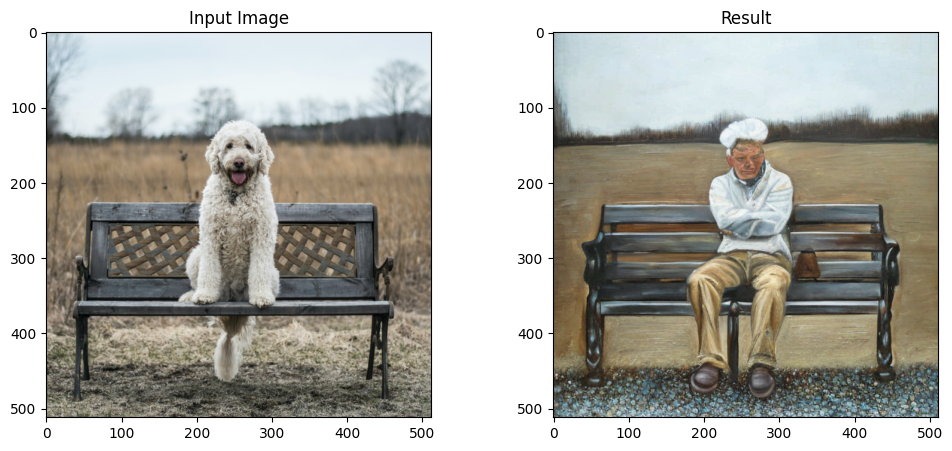

In [2]:
from matplotlib import pyplot as plt
from utils import download_image
import os

os.environ[
    "PYTORCH_HIP_ALLOC_CONF"] = "garbage_collection_threshold:0.9,max_split_size_mb:128"

init_image = download_image('input_for_img2img.png').resize((512, 512))
mask_image = download_image('input_mask_for_img2img.png').resize((512, 512))

# Apply Img2Img
result_image = img2img_pipe(
    prompt="An oil painting of a man on a bench",
    image=init_image, # The starting image
    strength=0.6, # 0 for no change, 1.0 for max strength
).images[0]

# View the result
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].imshow(init_image);axs[0].set_title('Input Image')
axs[1].imshow(result_image);axs[1].set_title('Result');